# Graph EDA
An example notebook where we generate a graph over a tabular dataset (using NetworkX) and then we query it to answer several questions.

In [ ]:
from IPython.display import clear_output

In [26]:
!pip install dowhy==0.11.1
clear_output()

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 1. Initial example
* Undirected graph generation and visualization

In [2]:
# Creating synthetic dataset
data = {
    'node_name': ['Node1', 'Node2', 'Node3', 'Node4', 'Node5'],
    'node_property1': ['cat11', 'cat12', 'cat13', 'cat11', 'cat12'],
    'node_property2': ['cat21', 'cat22', 'cat23', 'cat23', 'cat21'],
    'node_edges': [['Node2', 'Node3', 'Node4'], ['Node1', 'Node3'], ['Node1', 'Node2', 'Node4'], ['Node1', 'Node3', 'Node5'], ['Node4']]
}

df = pd.DataFrame(data)
df.head()

,node_name,node_property1,node_property2,node_edges
0,Node1,cat11,cat21,"[Node2, Node3, Node4]"
1,Node2,cat12,cat22,"[Node1, Node3]"
2,Node3,cat13,cat23,"[Node1, Node2, Node4]"
3,Node4,cat11,cat23,"[Node1, Node3, Node5]"
4,Node5,cat12,cat21,[Node4]


In [3]:
# Creating graph from the dataframe
G = nx.Graph()

# Adding nodes
for idx, row in df.iterrows():
    G.add_node(row['node_name'], property1=row['node_property1'], property2=row['node_property2'])

# Adding edges
for idx, row in df.iterrows():
    for edge in row['node_edges']:
        G.add_edge(row['node_name'], edge)

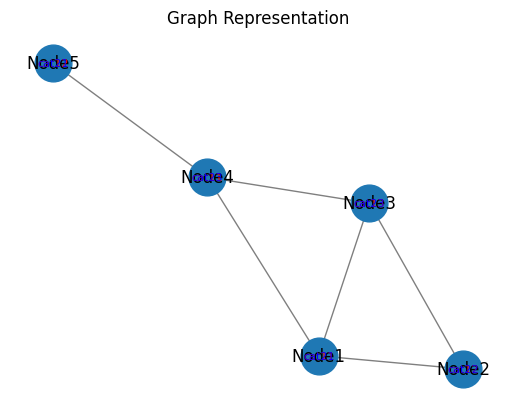

In [4]:
# Visualizing the graph
pos = nx.spring_layout(G)  # Positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Adding node properties as labels
node_props1 = nx.get_node_attributes(G, 'property1')
nx.draw_networkx_labels(G, pos, labels=node_props1, font_size=8, font_color='r')

node_props2 = nx.get_node_attributes(G, 'property2')
nx.draw_networkx_labels(G, pos, labels=node_props2, font_size=8, font_color='b')

plt.title('Graph Representation')
plt.axis('off')
plt.show()

## 2. Directed graph

In [28]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from dowhy.utils import plot

In [17]:
def generate_synthetic_data(N):
    # Creating synthetic dataset
    data = {
        'node_name': ['Node{}'.format(i) for i in range(1, N + 1)],
        'node_property1': [random.choice(['cat11', 'cat12', 'cat13']) for _ in range(N)],
        'node_property2': [random.choice(['cat21', 'cat22', 'cat23']) for _ in range(N)],
        'node_edges': [[] for _ in range(N)]
    }

    # Adding random unidirectional edges for each node
    for i in range(N):
        num_edges = random.randint(0, min(3, N - 1))  # Ensuring not to exceed the number of nodes
        available_descendants = data['node_name'][:i] + data['node_name'][i+1:]
        edges = random.sample(available_descendants, num_edges)
        data['node_edges'][i] = edges

    df = pd.DataFrame(data)
    return df

# Example usage
N = 7  # Number of nodes
df = generate_synthetic_data(N)
print(df)

  node_name node_property1 node_property2             node_edges
0     Node1          cat11          cat22                     []
1     Node2          cat12          cat22  [Node5, Node3, Node7]
2     Node3          cat13          cat22                     []
3     Node4          cat13          cat21                [Node5]
4     Node5          cat11          cat22                     []
5     Node6          cat12          cat23  [Node4, Node5, Node3]
6     Node7          cat12          cat22                     []


In [19]:
# Creating directed graph from the dataframe
G = nx.DiGraph()

# Adding nodes
for idx, row in df.iterrows():
    G.add_node(row['node_name'], property1=row['node_property1'], property2=row['node_property2'])

# Adding directed edges
for idx, row in df.iterrows():
    for edge in row['node_edges']:
        G.add_edge(row['node_name'], edge)

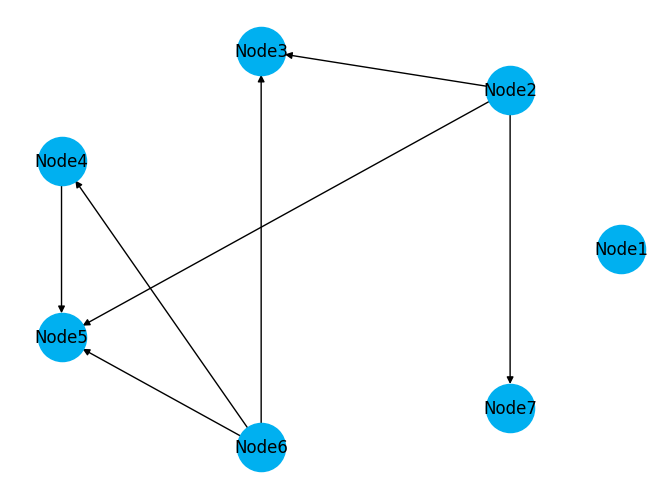

In [23]:
# Plot graph (default)
COLORS = [
    '#00B0F0',
    '#FF0000'
]
nx.draw(
    G,
    with_labels=True,
    node_size=1200,
    font_size=12,
    font_color='black',
    node_color=COLORS[0],
    pos=nx.circular_layout(G)
)

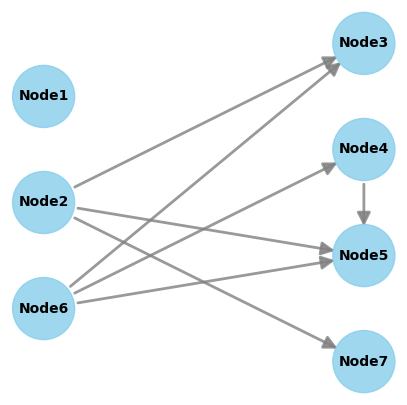

In [30]:
# Plot graph (alternative)
plot(G)

In [37]:
# Plot node properties
node_props1 = nx.get_node_attributes(G, 'property1')
print(node_props1)
node_props2 = nx.get_node_attributes(G, 'property2')
print(node_props2)

{'Node1': 'cat11', 'Node2': 'cat12', 'Node3': 'cat13', 'Node4': 'cat13', 'Node5': 'cat11', 'Node6': 'cat12', 'Node7': 'cat12'}
{'Node1': 'cat22', 'Node2': 'cat22', 'Node3': 'cat22', 'Node4': 'cat21', 'Node5': 'cat22', 'Node6': 'cat23', 'Node7': 'cat22'}


In [31]:
# Obtaining all parents for nodes where node_property1 is 'cat13'
cat13_parents = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat13':
        cat13_parents[node] = list(G.predecessors(node))

print("Parents for nodes where node_property1 is 'cat13':")
print(cat13_parents)

Parents for nodes where node_property1 is 'cat13':
{'Node3': ['Node2', 'Node6'], 'Node4': ['Node6']}


In [38]:
# Obtaining all child for nodes where node_property1 is 'cat13'
cat13_childs = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat13':
        cat13_childs[node] = list(G.successors(node))

print("Child for nodes where node_property1 is 'cat13':")
print(cat13_childs)

Child for nodes where node_property1 is 'cat13':
{'Node3': [], 'Node4': ['Node5']}


* We see that node3 and node4 have that property 'cat13'
* First, we see all the parent nodes for those nodes
* Second, we see all the child nodes for those nodes

In [39]:
# Obtaining all parents for nodes where node_property1 is 'cat11'
cat11_parents = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat11':
        cat11_parents[node] = list(G.predecessors(node))

print("Parents for nodes where node_property1 is 'cat11':")
print(cat11_parents)

Parents for nodes where node_property1 is 'cat11':
{'Node1': [], 'Node5': ['Node2', 'Node4', 'Node6']}


## 3. Example with more nodes

In [39]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from dowhy.utils import plot

In [42]:
def generate_synthetic_data(N):
    # Creating synthetic dataset
    data = {
        'node_name': ['Node{}'.format(i) for i in range(1, N + 1)],
        'node_property1': [random.choice(['cat11', 'cat12', 'cat13']) for _ in range(N)],
        'node_property2': [random.choice(['cat21', 'cat22', 'cat23']) for _ in range(N)],
        'node_edges': [[] for _ in range(N)]
    }

    # Adding random unidirectional edges for each node
    for i in range(N):
        num_edges = random.randint(0, min(3, N - 1))  # Ensuring not to exceed the number of nodes
        available_descendants = data['node_name'][:i] + data['node_name'][i+1:]
        edges = random.sample(available_descendants, num_edges)
        data['node_edges'][i] = edges

    df = pd.DataFrame(data)
    return df

# Example usage
N = 25  # Number of nodes
df = generate_synthetic_data(N)
display(df.head(10))

,node_name,node_property1,node_property2,node_edges
0,Node1,cat11,cat21,"[Node10, Node6]"
1,Node2,cat11,cat22,"[Node23, Node12]"
2,Node3,cat12,cat21,[Node5]
3,Node4,cat12,cat23,[]
4,Node5,cat12,cat22,[]
5,Node6,cat11,cat23,[Node20]
6,Node7,cat11,cat22,[Node17]
7,Node8,cat13,cat22,"[Node17, Node3, Node15]"
8,Node9,cat13,cat21,"[Node1, Node17, Node16]"
9,Node10,cat13,cat22,[]


In [43]:
# Creating directed graph from the dataframe
G = nx.DiGraph()

# Adding nodes
for idx, row in df.iterrows():
    G.add_node(row['node_name'], property1=row['node_property1'], property2=row['node_property2'])

# Adding directed edges
for idx, row in df.iterrows():
    for edge in row['node_edges']:
        G.add_edge(row['node_name'], edge)

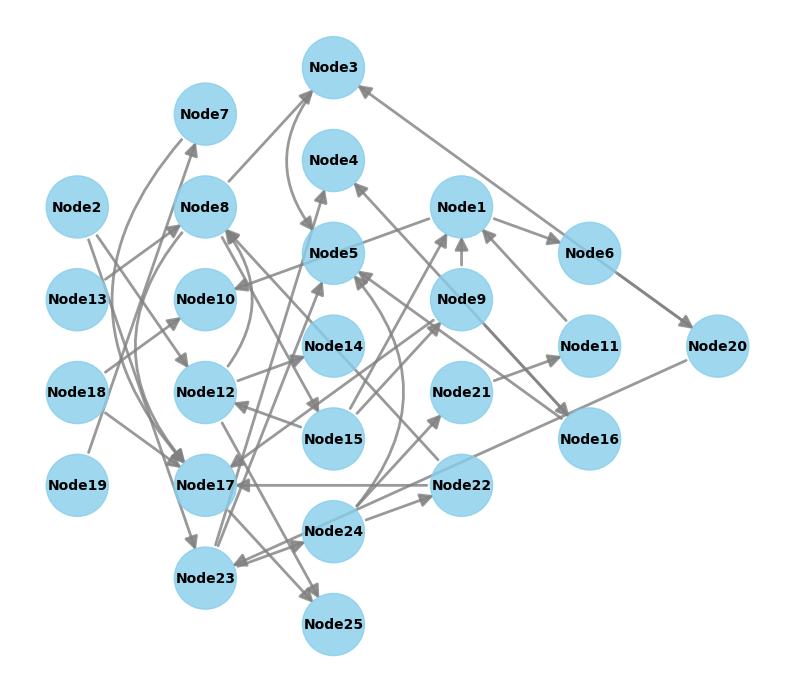

In [44]:
# Plot graph (alternative)
plot(G)

In [45]:
# Plot node properties
node_props1 = nx.get_node_attributes(G, 'property1')
print(node_props1)
node_props2 = nx.get_node_attributes(G, 'property2')
print(node_props2)

{'Node1': 'cat11', 'Node2': 'cat11', 'Node3': 'cat12', 'Node4': 'cat12', 'Node5': 'cat12', 'Node6': 'cat11', 'Node7': 'cat11', 'Node8': 'cat13', 'Node9': 'cat13', 'Node10': 'cat13', 'Node11': 'cat13', 'Node12': 'cat12', 'Node13': 'cat12', 'Node14': 'cat12', 'Node15': 'cat13', 'Node16': 'cat13', 'Node17': 'cat13', 'Node18': 'cat12', 'Node19': 'cat13', 'Node20': 'cat11', 'Node21': 'cat11', 'Node22': 'cat11', 'Node23': 'cat11', 'Node24': 'cat13', 'Node25': 'cat12'}
{'Node1': 'cat21', 'Node2': 'cat22', 'Node3': 'cat21', 'Node4': 'cat23', 'Node5': 'cat22', 'Node6': 'cat23', 'Node7': 'cat22', 'Node8': 'cat22', 'Node9': 'cat21', 'Node10': 'cat22', 'Node11': 'cat22', 'Node12': 'cat22', 'Node13': 'cat23', 'Node14': 'cat23', 'Node15': 'cat21', 'Node16': 'cat21', 'Node17': 'cat23', 'Node18': 'cat22', 'Node19': 'cat22', 'Node20': 'cat23', 'Node21': 'cat22', 'Node22': 'cat23', 'Node23': 'cat23', 'Node24': 'cat22', 'Node25': 'cat22'}


In [46]:
# Obtaining all parents for nodes where node_property1 is 'cat12'
cat_parents = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat12':
        cat_parents[node] = list(G.predecessors(node))

print("Parents for nodes where node_property1 is 'cat12':")
print(cat_parents)

Parents for nodes where node_property1 is 'cat12':
{'Node3': ['Node8', 'Node20'], 'Node4': ['Node16', 'Node23'], 'Node5': ['Node3', 'Node16', 'Node23', 'Node24'], 'Node12': ['Node2', 'Node15'], 'Node13': [], 'Node14': ['Node12'], 'Node18': [], 'Node25': ['Node12', 'Node17']}


In [51]:
# Obtaining all ancestors for nodes where node_property1 is 'cat12'
cat_ancestors = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat12':
        cat_ancestors[node] = list(nx.ancestors(G, node))

print("Ancestors for nodes where node_property1 is 'cat12':")
print(cat_ancestors)
print(cat_ancestors['Node25'])

Ancestors for nodes where node_property1 is 'cat12':
{'Node3': ['Node23', 'Node22', 'Node11', 'Node8', 'Node24', 'Node9', 'Node21', 'Node2', 'Node13', 'Node1', 'Node6', 'Node12', 'Node15', 'Node20'], 'Node4': ['Node23', 'Node22', 'Node11', 'Node8', 'Node24', 'Node9', 'Node21', 'Node2', 'Node1', 'Node16', 'Node13', 'Node6', 'Node12', 'Node15', 'Node20'], 'Node5': ['Node23', 'Node22', 'Node11', 'Node8', 'Node24', 'Node3', 'Node9', 'Node21', 'Node2', 'Node13', 'Node16', 'Node1', 'Node6', 'Node12', 'Node15', 'Node20'], 'Node12': ['Node23', 'Node22', 'Node11', 'Node8', 'Node24', 'Node9', 'Node21', 'Node2', 'Node13', 'Node1', 'Node6', 'Node15', 'Node20'], 'Node13': [], 'Node14': ['Node23', 'Node22', 'Node11', 'Node8', 'Node24', 'Node9', 'Node21', 'Node2', 'Node13', 'Node1', 'Node6', 'Node12', 'Node15', 'Node20'], 'Node18': [], 'Node25': ['Node17', 'Node18', 'Node23', 'Node19', 'Node22', 'Node11', 'Node8', 'Node24', 'Node9', 'Node21', 'Node2', 'Node7', 'Node13', 'Node1', 'Node6', 'Node12', 'N

In [53]:
# Obtaining all ancestors for nodes where node_property1 is 'cat12' and property2 is 'cat21'
cat_ancestors = {}
for node in G.nodes():
    if G.nodes[node]['property1'] == 'cat12':
        ancestors = list(nx.ancestors(G, node))
        filtered_ancestors = [ancestor for ancestor in ancestors if G.nodes[ancestor]['property2'] == 'cat21']
        cat_ancestors[node] = filtered_ancestors

print("Ancestors for nodes where node_property1 is 'cat12' and property2 is 'cat21':")
print(cat_ancestors)
print(cat_ancestors['Node25'])

Ancestors for nodes where node_property1 is 'cat12' and property2 is 'cat21':
{'Node3': ['Node9', 'Node1', 'Node15'], 'Node4': ['Node9', 'Node1', 'Node16', 'Node15'], 'Node5': ['Node3', 'Node9', 'Node16', 'Node1', 'Node15'], 'Node12': ['Node9', 'Node1', 'Node15'], 'Node13': [], 'Node14': ['Node9', 'Node1', 'Node15'], 'Node18': [], 'Node25': ['Node9', 'Node1', 'Node15']}
['Node9', 'Node1', 'Node15']
